In [ ]:
#unsupervised learning  ,means This is exploration, not prediction.


In [ ]:
#K-MEANS CLUSTERING
# It is used to group similar data points together based on their features.
# It is an unsupervised learning algorithm, meaning it does not require labeled data for training.
# The goal of K-means clustering is to partition the data into K clusters, where each cluster is represented by its centroid (the mean of the data points in that cluster).
# The algorithm works by iteratively assigning data points to the nearest centroid and then updating the centroids based on the assigned points.
# The process continues until the centroids no longer change significantly or a maximum number of iterations is reached.


In [ ]:
"""K-Means works in 4 steps:

Choose K (number of clusters)

Randomly place K centroids

Assign each point to nearest centroid

Move centroids to center of assigned points

Repeat until centroids stop moving"""

In [5]:
import pandas as pd

df = pd.read_csv(r"C:\Users\USER\Downloads\Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

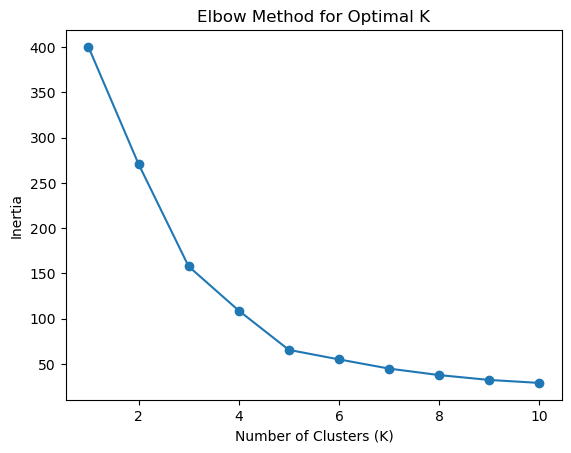

In [9]:
plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [10]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


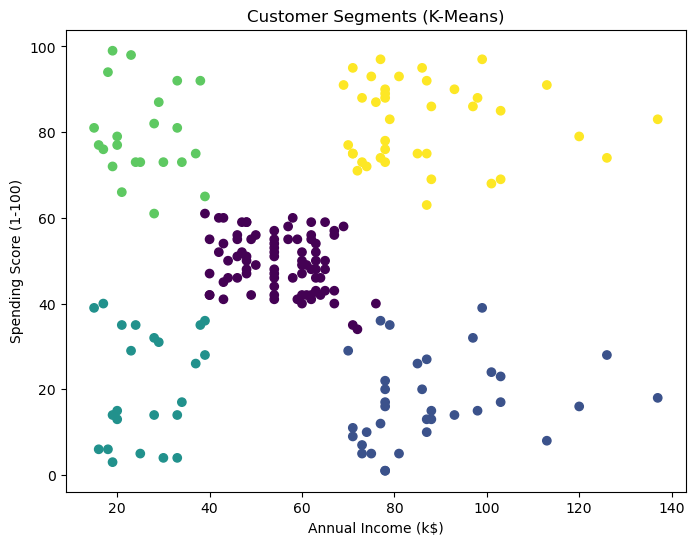

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    c=df["Cluster"],
    cmap="viridis"
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (K-Means)")
plt.show()


In [12]:
df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,25.727273,79.363636
4,86.538462,82.128205
